# Student Alcohol Consumption
__Do students who consume alcohol score less in exams?__

* __Why this topic?__
* __Data Source : Kaggle (2 datasets - Portuguese, Maths)__
* __Rows and Columns (1000 * 33)__
* __Important Columns:__ <br>
It contains a lot of interesting social (family background, alcohol consumption), gender and study information about students. You can use it for some EDA or try to predict students final grade.

In [4]:
%matplotlib inline
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualize
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.formula.api import ols
if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep

In [6]:
#Merging the the files into final
pd.options.display.max_rows = 10
sns.set(style='ticks', context='talk')

d1=pd.read_csv("/Users/ruchi/data/student-mat.csv")
d2=pd.read_csv("/Users/ruchi/data/student-por.csv")

final = pd.merge(d1, d2, how='outer',on=["school","sex","age","address","famsize","Pstatus",
                            "Medu","Fedu","Mjob","Fjob","reason","nursery","internet",
                            "guardian","guardian","traveltime","studytime","failures",
                            "schoolsup","famsup","activities","higher","romantic",
                            "famrel","freetime","goout","Dalc","Walc","health","absences"])
final.to_csv('final.csv', index=False)

In [7]:
#Merging both the csv to get students who took both Maths and Portuguese
dinner = pd.merge(d1, d2, how='inner',on=["school","sex","age","address","famsize","Pstatus",
                            "Medu","Fedu","Mjob","Fjob","reason","nursery","internet",
                            "guardian","guardian","traveltime","studytime","failures",
                            "schoolsup","famsup","activities","higher","romantic",
                            "famrel","freetime","goout","Dalc","Walc","health","absences"])
dinner.to_csv('inner.csv', index=False)
dinner.shape


#Merging both the csv to get students who took either Maths or Portuguese
douter = pd.merge(d1, d2, how='outer',on=["school","sex","age","address","famsize","Pstatus",
                            "Medu","Fedu","Mjob","Fjob","reason","nursery","internet",
                            "guardian","guardian","traveltime","studytime","failures",
                            "schoolsup","famsup","activities","higher","romantic",
                            "famrel","freetime","goout","Dalc","Walc","health","absences"])
douter.to_csv('outer.csv', index=False)

print(douter)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
954     MS   F   19       R     GT3       T     2     3  services     other   
955     MS   F   18       U     LE3       T     3     1   teacher  services   
956     MS   F   18       U     GT3       T     1     1     other     other   
957     MS   M   17       U     LE3       T     3     1  services  services   
958     MS   M   18       R     LE3       T     3     2  services     other   

     ...  Walc health  absences  G1_x  G2_x  G3_x p

In [51]:
#Calculating the average of the grades scored by students
d2['AvgGrade']= d2[['G1', 'G2', 'G3']].mean(axis=1)
d1['AvgGrade']= d1[['G1', 'G2', 'G3']].mean(axis=1)

In [52]:
#Pivot on Maths table
df = d1
pivot = pd.pivot_table(df,
            values = ['AvgGrade', 'G1', 'G2', 'G3'''],
            index = ['school',
                     'sex', 
                    'famsize',
                     'paid',
                    'guardian'], 
                       columns= ['Mjob'],
                       aggfunc=[np.mean], 
                       margins=True).fillna('')
pivot

mean                                      \
                                 AvgGrade                                       
Mjob                              at_home   health    other services  teacher   
school sex famsize paid guardian                                                
GP     F   GT3     no   father    8.11111  6.33333  9.11111  10.3333            
                        mother    7.76923  12.1667  9.74074  11.9048     14.5   
                        other     11.5556               6.5                     
                   yes  father          9  16.1667  11.6667  12.8333            
                        mother    10.6667     14.5  9.01852  10.4444  10.3333   
...                                   ...      ...      ...      ...      ...   
MS     M   LE3     no   mother         10                    13.1667            
                   yes  father    12.6667                                       
                        mother                                             13   
                        other                                      9            
All                               9.76271  12.2353  10.0591  11.2071  11.2701   

                                                                        \
                                                  G1                     
Mjob                                    All  at_home   health    other   
school sex famsize paid guardian                                         
GP     F   GT3     no   father     9.187500  8.66667      7.5        9   
                        mother     9.939394  8.84615       12  10.1111   
                        other      9.533333       12               8.5   
                   yes  father    12.266667        9     15.5    10.75   
                        mother    10.291667  10.6667    14.25  8.88889   
...                                     ...      ...      ...      ...   
MS     M   LE3     no   mother    11.583333     10.5                     
                   yes  father    12.666667       14                     
                        mother    13.000000                              
                        other      9.000000                              
All                               10.679325  10.4576  12.2059  10.1773   

                                             ...                        \
                                             ...           G2            
Mjob                             services    ...        other services   
school sex famsize paid guardian             ...                         
GP     F   GT3     no   father      10.75    ...      9.33333    9.875   
                        mother    13.4286    ...      9.38889       11   
                        other                ...          5.5            
                   yes  father         12    ...           12     13.5   
                        mother    10.4667    ...      9.44444     10.8   
...                                   ...    ...          ...      ...   
MS     M   LE3     no   mother       12.5    ...                    14   
                   yes  father               ...                         
                        mother               ...                         
                        other           9    ...                     9   
All                               11.3883    ...      10.1773  11.2136   

                                                                        \
                                                           G3            
Mjob                              teacher        All  at_home   health   
school sex famsize paid guardian                                         
GP     F   GT3     no   father              9.312500  6.66667        4   
                        mother       14.5   9.681818  6.53846     12.5   
                        other               8.800000  11.6667            
                   yes  father             12.500000        9       17   
       

In [53]:
# Pivot on Portuguese table
df = d2
pivot = pd.pivot_table(df,
            values = ['AvgGrade', 'G1', 'G2', 'G3'''],
            index = ['school',
                     'sex', 
                    'famsize',
                     'paid',
                    'guardian'], 
                       columns= ['Mjob'],
                       aggfunc=[np.mean], 
                       margins=True).fillna('')
pivot

mean                                      \
                                 AvgGrade                                       
Mjob                              at_home   health    other services  teacher   
school sex famsize paid guardian                                                
GP     F   GT3     no   father     13.125  14.8333  12.9091  12.9394            
                        mother    12.1884  15.1111  12.3203  12.2222  13.5385   
                        other          10  13.3333  11.3333                10   
                   yes  mother    10.8889                12  15.6667  11.3333   
                        other                       11.3333       13            
...                                   ...      ...      ...      ...      ...   
MS     M   GT3     yes  father                            9                     
                        mother         11           8.66667     10.5            
           LE3     no   father    10.4444     10.5  12.3333           11.6667   
                        mother    9.45833              12.5  11.4444  15.6667   
All                               10.7358  12.7014  11.4574   11.826  12.7963   

                                                                        \
                                                  G1                     
Mjob                                    All  at_home   health    other   
school sex famsize paid guardian                                         
GP     F   GT3     no   father    13.196078   12.125       15  12.5455   
                        mother    12.597884  11.8261  14.6667  12.0784   
                        other     11.266667        9       14       11   
                   yes  mother    11.944444  10.6667                10   
                        other     12.166667                         10   
...                                     ...      ...      ...      ...   
MS     M   GT3     yes  father     9.000000                         10   
                        mother    10.333333       10                 8   
           LE3     no   father    11.424242       10      9.5     12.4   
                        mother    11.052632     9.25                12   
All                               11.625064  10.4519  12.3958  11.2752   

                                             ...                        \
                                             ...           G2            
Mjob                             services    ...        other services   
school sex famsize paid guardian             ...                         
GP     F   GT3     no   father    12.6364    ...      12.9091  12.6364   
                        mother       11.7    ...      12.2157  12.1333   
                        other                ...      11.2857            
                   yes  mother         16    ...           13       15   
                        other          13    ...           12       13   
...                                   ...    ...          ...      ...   
MS     M   GT3     yes  father               ...         10.5            
                        mother         10    ...            9       11   
           LE3     no   father               ...           12            
                        mother       11.5    ...        12.25  11.3333   
All                               11.6103    ...      11.4264  11.7206   

                                                                        \
                                                           G3            
Mjob                              teacher        All  at_home   health   
school sex famsize paid guardian                                         
GP     F   GT3     no   father             13.088235       14       15   
                        mother    13.4615  12.507937  12.6087  15.6667   
                        other          10  11.200000       11       13   
                   yes  mother         11  12.166667  10.6667            
       

In [54]:
# The merged table with data of students of both the school
final.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1_x,G2_x,G3_x,G1_y,G2_y,G3_y
count,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,395.000000,395.000000,395.000000,649.000000,649.000000,649.000000
mean,16.755996,2.586027,2.364964,1.538060,1.958290,0.279458,3.914494,3.200209,3.186653,1.513034,2.311783,3.546403,4.660063,10.908861,10.713924,10.415190,11.399076,11.570108,11.906009
std,1.242473,1.116704,1.100514,0.739831,0.832741,0.672379,0.950216,1.035669,1.153912,0.936160,1.289826,1.424394,6.369059,3.319195,3.761505,4.581443,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,10.000000,10.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.000000,19.000000,19.000000


In [55]:
# Categorical Data present in the table
categorical_features = (final.select_dtypes(include=['object']).columns.values)
categorical_features

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid_x', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'paid_y'], dtype=object)

In [56]:
# Numerical / Non categorical data present in the table
numerical_features = final.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y'], dtype=object)

## __Correlation between features__
For broad perspective lets look at first correlation of features.

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5]),
 <a list of 16 Text yticklabel objects>)

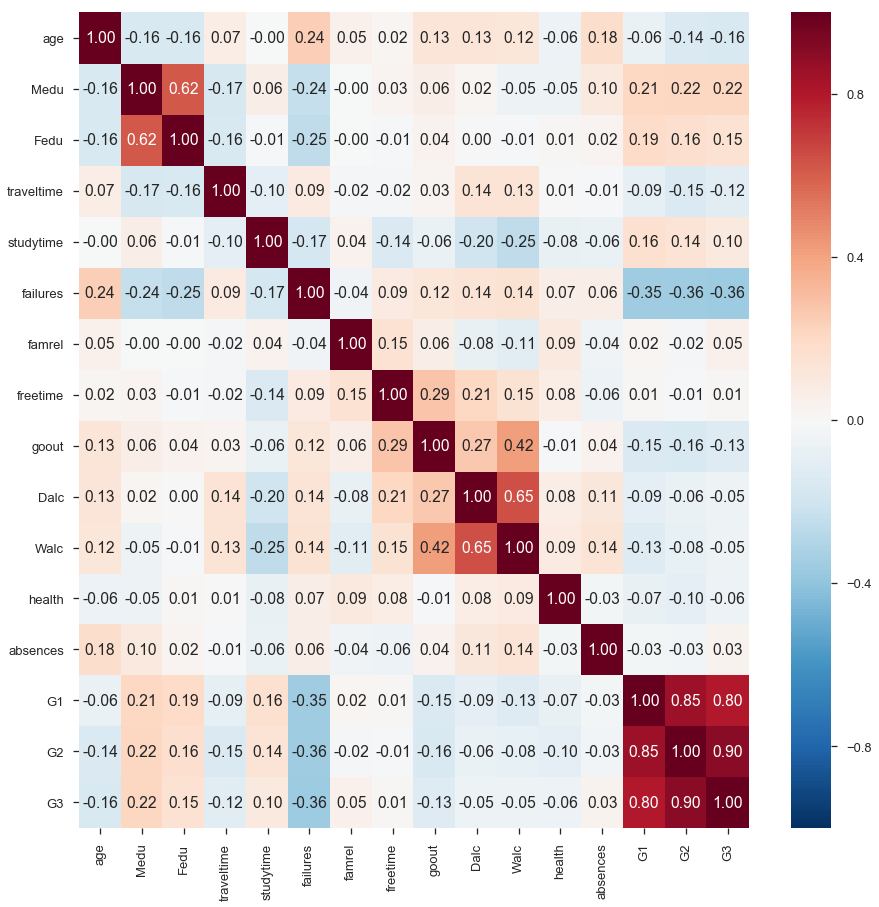

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(d1.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

As it can be seen from correlation map the education of parents, alcohol consumption of students and exam scores are highly correlated with each other.

## EDA

### __1. At what age students consumes more alcohol?__

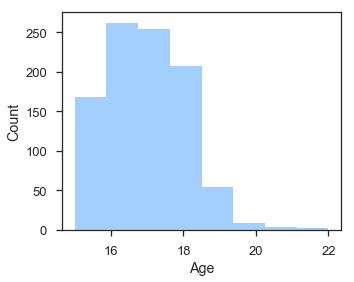

In [26]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(final['age'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Age")

We conclude that teenagers drink more alcohol compared to adults

### __2. Students consume more alcohol on weekend or weekday?__

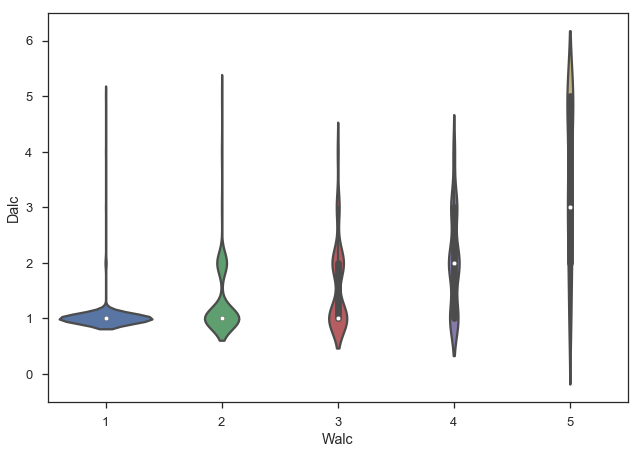

In [16]:
sns.violinplot(x="Walc", y="Dalc", data=final);

Students drink more alcohol on Weekend

### 3. Which gender consumes more alcohol on daily basis?

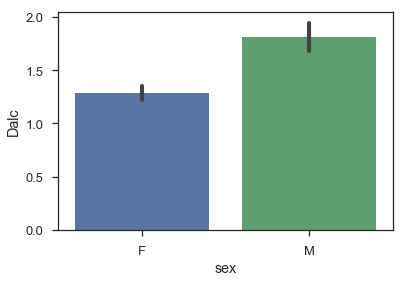

In [20]:
sns.barplot(x = "sex", y = "Dalc",data = d2)

So, we see that males consume more alcohol as compared to females on daily basis

### 4. __How do students in romantic relationship score?__

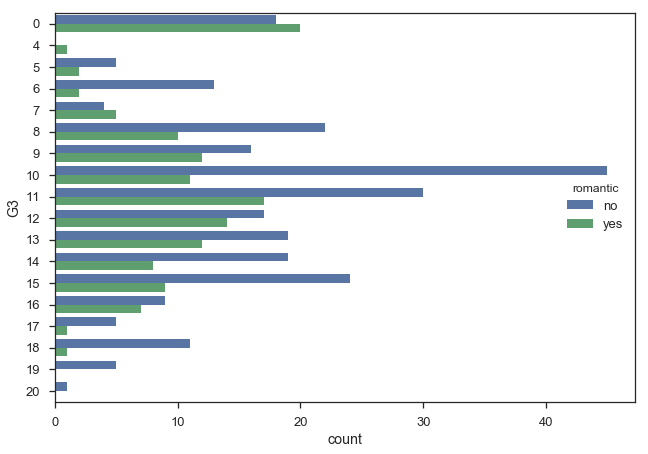

In [27]:
sns.countplot(hue="romantic", y="G3", data=d1);

As we see students who are in a romantic relationship score less

### __5. The health of which gender is most affected by alcohol consumption?__

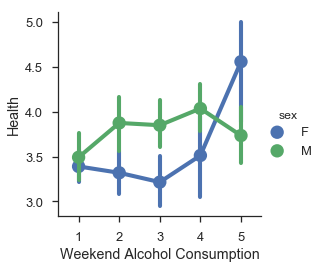

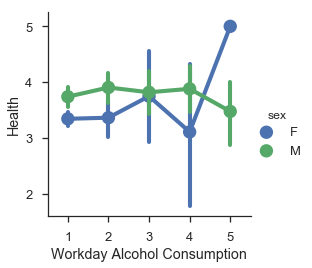

In [34]:
plot1 = sns.factorplot(x="Walc", y="health", hue="sex", data=final)
plot1.set(ylabel="Health", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="Dalc", y="health", hue="sex", data=final)
plot2.set(ylabel="Health", xlabel="Workday Alcohol Consumption")

Females heath is more affected by consumption of alcohol

### __6. Do students whose parents have higher education score good grades? __

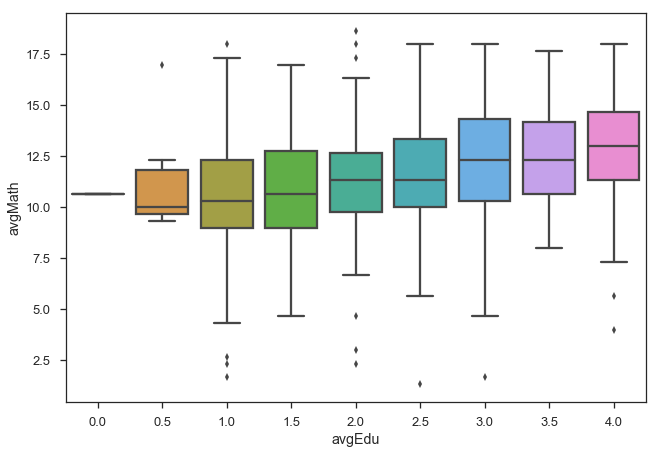

In [24]:
d2['avgMath']= d2[['G1', 'G2', 'G3']].mean(axis=1)
d2['avgEdu']=d2[['Medu','Fedu']].mean(axis=1)

#Lets consider a plot between the student grades to how well educated any of the parent is!
sns.boxplot(x = "avgEdu", y = "avgMath", data = d2)

Students whose parents are more qualified tend to get higher grades

### __7. What is the weekly frequency of students to consume alcohol?__<br>
There is no student who does not consume alcohol. However, all students at least 2 times in a week consume alcohol.

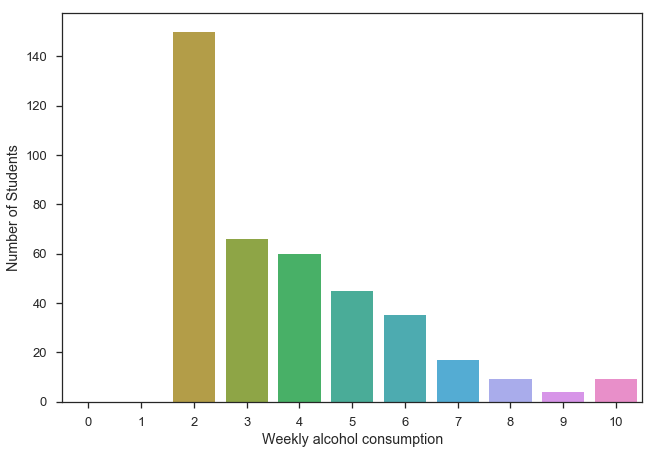

In [18]:
d1['Dalc'] = d1['Dalc'] + d1['Walc']
list = []
for i in range(11):
    list.append(len(d1[d1.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

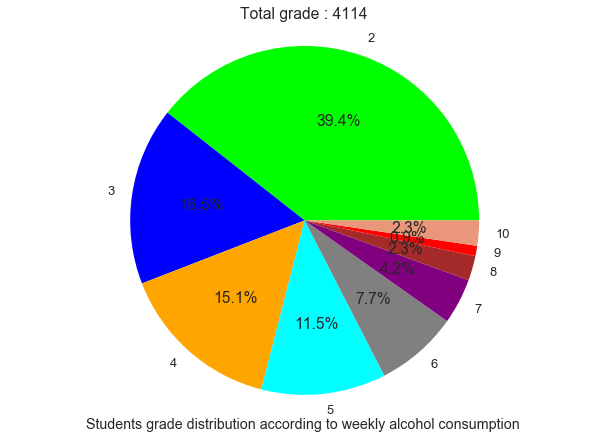

In [20]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']
explode = [0,0,0,0,0,0,0,0,0]
sizes = []
for i in range(2,11):
    sizes.append(sum(d1[d1.Dalc == i].G3))
total_grade = sum(sizes)
average = total_grade/float(len(d1))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(total_grade))
plt.xlabel('Students grade distribution according to weekly alcohol consumption')

We see that students who drink alcohol less score better grades

### 8. What is failure rate of the students consuming alcohol on weekend?

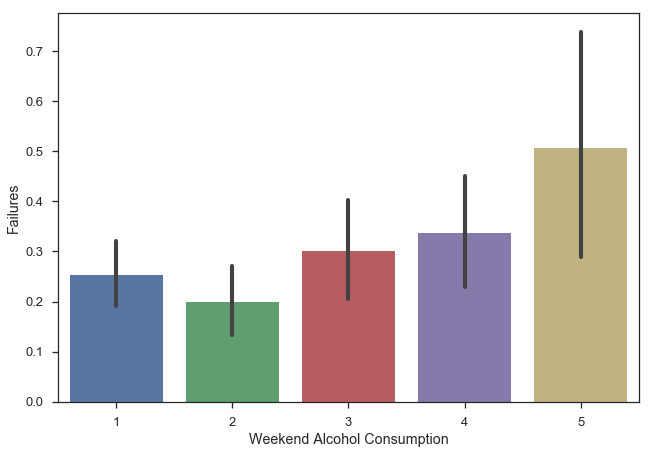

In [39]:
plot1 = sns.barplot(x="Walc", y="failures", data=douter)
plot1.set(ylabel="Failures", xlabel="Weekend Alcohol Consumption")

We see that students who consume more alcohol on weekends tend to have higher failure rate

## Machine Learning 

In [66]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

### 1. Logistic Regression

In [67]:
#Machine Learning models - Logistic
X=d2[['traveltime','studytime','G3','Dalc','Walc']] #Predictors
y=d2['sex'] #Response Variable

In [116]:
# 40% Test Data, 60% Training Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=59)

from sklearn.linear_model import LogisticRegression

In [91]:
log=LogisticRegression()

In [92]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
predicts=log.predict(X_test)

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
print(classification_report(y_test,predicts))
print('\n')
print(confusion_matrix(y_test,predicts))

             precision    recall  f1-score   support

          F       0.75      0.81      0.78       163
          M       0.63      0.55      0.59        97

avg / total       0.71      0.71      0.71       260



[[132  31]
 [ 44  53]]


### 2. Linear Regression

In [40]:
import statsmodels.api as sm
from sklearn import linear_model
#Linear Regression
X=d2[['age','Medu','Fedu','absences','G1','G2']]
y=d2['G3']

/Users/ruchi/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=59)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)# Now we can just create a data frame to store this values of coefficients in a data frame
#cdf=pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficient'])

In [43]:
# Now we can just create a data frame to store this values of coefficients in a data frame
cdf=pd.DataFrame(regr.coef_,X_train.columns,columns=['Coefficient'])
cdf

,Coefficient
age,0.035736
Medu,0.017232
Fedu,0.026441
absences,0.030022
G1,0.173771
G2,0.847473


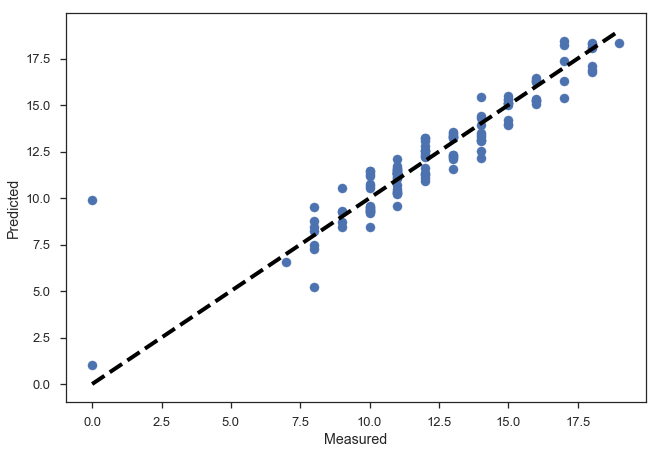

In [100]:
#10 samples
predicted = cross_val_predict(regr, X_test, y_test, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

As we can see that it is a perfect linear fit. So the predictors Age, Medu, Fedu, Absences, G1 and G2 are strongly related to the response variable G3

In [45]:
model = sm.OLS(y, X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.023e+04
Date:                Mon, 11 Dec 2017   Prob (F-statistic):               0.00
Time:                        00:58:21   Log-Likelihood:                -1068.7
No. Observations:                 649   AIC:                             2149.
Df Residuals:                     643   BIC:                             2176.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0152      0.013     -1.196      0.232      -0.040       0.010
Medu          -0.0387      0.058     -0.667      0.505      -0.153       0.075
Fedu           0.0231      0.059      0.391      0.696      -0.093       0.139
absences       0.0202      0.011      1.854      0.064      -0.001       0.042
G1             0.1523      0.036      4.283      0.000       0.082       0.222
G2             0.8985      0.034     26.316      0.000       0.831       0.966
==============================================================================
Omnibus:                      463.984   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10445.450
Skew:                          -2.887   Prob(JB):                         0.00
Kurtosis:                      21.787   Cond. No.                         36.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared which is goodness of fit is 99%, so it is a very good fit

In [108]:
from sklearn.model_selection import train_test_split
X=d2[['age','Medu','Fedu','absences','G1','G2']]
y=d2['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 3. Decision Tree Classifier

In [106]:
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.98714652956298199

### 4. Matrix Accuracy

In [114]:
y_pred = clf.predict(X_test)
acc_test = metrics.accuracy_score(y_test,y_pred)
acc_test

0.76923076923076927

### 5. Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(X_train, y_train)
forest.score(X_train, y_train)
y_pred = forest.predict(X_test)
acc_test = metrics.accuracy_score(y_test,y_pred)
acc_test

0.43846153846153846

## Important Features

          importance
feature             
G2             0.286
G1             0.211
absences       0.165
age            0.130
Medu           0.107
Fedu           0.101


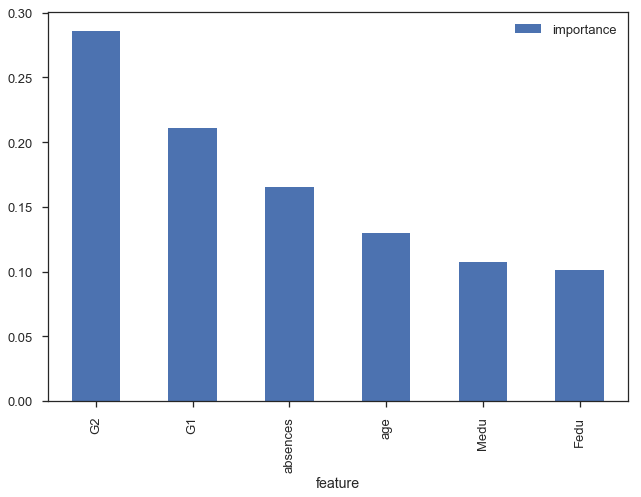

In [111]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances)
importances.plot.bar()

Grades G1 and G2 are most important feature for predicting final grade G3

## Conclusion:
* The failure rate of students who consume alcohol frequently is more.
* Students whose parents are more qualified tend to get higher grades 

## References:
* https://www.kaggle.com/calcifer/alcohol-consumption-and-average-grades/data
* https://seaborn.pydata.org/tutorial/categorical.html

## Team Members:
* Sakshi Kalani
* Saptak Dalvi
* Deepak Udyavar
* Ruchi Jain